# Example

In [1]:
# import libraries
import gym
import gym_trading
import numpy as np

In [2]:
# creating environment
env = gym.make('trading-v0', mode_random=True, n_samples=5000)

print('Number of actions:', env.action_space.n)

Number of actions: 3


In [3]:
# resetting environement
observation = env.reset()
print(observation, env.get_current_cripto())

('2019-09-06 04-AM', 66.41) LTC


In [4]:
# simulating a trading session
done = False
while not done:
    
    # random action [NOPE, BUY, SELL]
    action = np.random.randint(0, 3)
    observation, reward, done, _ = env.step(action)

print(f'Relative increment: {round(env.get_percentage_profit() * 100, 2)} %')

Relative increment: -99.31 %


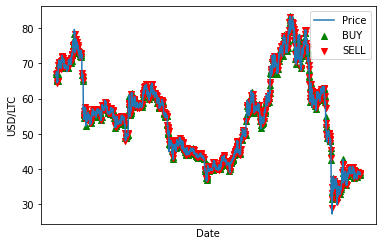

In [5]:
env.render()